<a href="https://colab.research.google.com/github/LakshithaMurali/TECHNICAL-ASSESSMENT/blob/main/TASK_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EXPLORATORY DATA ANALYSIS



                               OBJECTIVE
	The ultimate goal behind this analysis is to perform exploratory              data analysis on the provided book data set, with the vision of              developing a book recommendation system.

                  Book Recommendation System
	 Provides suggestion based on personal preferences.
	 The aim is to enhance user engagement and satisfaction by providing relevant and appealing reading choices.
	This system can consider factors like genre, author, user ratings and similar user’s preferences to offer tailored book recommendations


Our Solution: Predicts the user preferences based on
	Average rating
	Text Reviews
	Rating Count
	Desired Authors
	Title of the Book
       


# HANDLING MISSING VALUES

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [22]:
df = pd.read_excel('/content/Task 3 Data Set.xlsx')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   bookID              11127 non-null  int64 
 1   title               11127 non-null  object
 2   authors             11127 non-null  object
 3   average_rating      11127 non-null  object
 4   isbn                11127 non-null  object
 5   isbn13              11127 non-null  object
 6   language_code       11127 non-null  object
 7   num_pages           11127 non-null  object
 8   ratings_count       11127 non-null  int64 
 9   text_reviews_count  11127 non-null  int64 
 10  publication_date    11127 non-null  object
 11  publisher           11127 non-null  object
 12  Unnamed: 12         3 non-null      object
dtypes: int64(3), object(10)
memory usage: 1.1+ MB


In [54]:
df.isnull().sum()

bookID                    0
title                     0
authors                   0
average_rating            0
isbn                      0
isbn13                    0
language_code             0
num_pages                 0
ratings_count             0
text_reviews_count        0
publication_date          0
publisher                 0
Unnamed: 12           11124
dtype: int64

In [56]:
df.describe()

,bookID,ratings_count,text_reviews_count
count,11127.000000,1.112700e+04,11127.000000
mean,21310.938887,1.793647e+04,541.859531
std,13093.358023,1.124794e+05,2576.175586
min,1.000000,0.000000e+00,0.000000
25%,10287.000000,1.040000e+02,9.000000
50%,20287.000000,7.450000e+02,46.000000
75%,32104.500000,4.993500e+03,237.500000
max,45641.000000,4.597666e+06,94265.000000


In [1]:
pip install -U scikit-learn


In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [24]:
df.head(11127)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPrÃ©,4.57,439785960,9780000000000,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPrÃ©,4.49,439358078,9780000000000,eng,870,2153167,29221,2004-01-09 00:00:00,Scholastic Inc.,NaN
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9780000000000,eng,352,6333,244,2003-01-11 00:00:00,Scholastic,NaN
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPrÃ©,4.56,043965548X,9780000000000,eng,435,2339585,36325,2004-01-05 00:00:00,Scholastic Inc.,NaN
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPrÃ©,4.78,439682584,9780000000000,eng,2690,41428,164,9/13/2004,Scholastic,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9780000000000,eng,512,156,20,12/21/2004,Da Capo Press,NaN
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,140110879,9780000000000,eng,635,783,56,1988-01-12 00:00:00,Penguin Books,NaN
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,140131965,9780000000000,eng,415,820,95,1993-01-08 00:00:00,Penguin Books,NaN
11125,45639,Poor People,William T. Vollmann,3.72,60878827,9780000000000,eng,434,769,139,2/27/2007,Ecco,NaN


# **With the help of average_rating and ratings_count we will get the  most commented books of our dataset**

<ipython-input-65-3c3418bf75bb>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


<Axes: xlabel='average_rating', ylabel='title'>

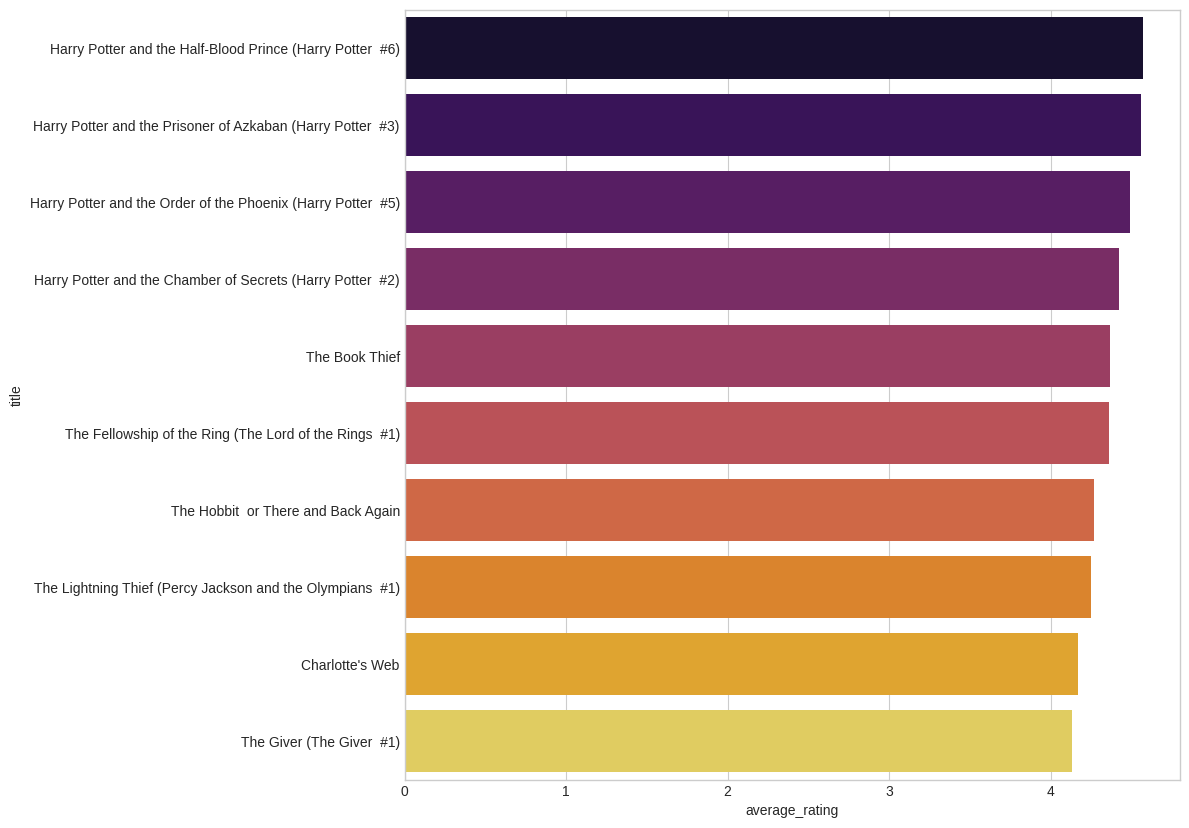

In [65]:
top_ten = df[df['ratings_count'] > 1000000]
top_ten.sort_values(by='average_rating', ascending=False)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 10))
data = top_ten.sort_values(by='average_rating', ascending=False).head(10)
sns.barplot(x="average_rating", y="title", data=data, palette='inferno')

# **We infer that most of the Harry Potter books are rated 5 which is the highest off all.**

#BOOK RECOMMENDATION SYSTEM

# DATA PREPARATION

In [73]:
df2 =()

In [74]:
df2 = pd.DataFrame(df,columns = ['average_rating'])

In [77]:
df2.head(11127)

,average_rating
0,4.57
1,4.49
2,4.42
3,4.56
4,4.78
...,...
11122,4.06
11123,4.08
11124,3.96
11125,3.72


# Create a new column called ‘rating_between’. We will divide our average rating column into different categories such as rating between 0 and 1, 1 and 2, etc. This will work as one of the features that we will build into our model so that it can make better predictions:

In [ ]:
df2.loc[ (df2['average_rating'] >= 0) & (df2['average_rating'] <= 1), 'rating_between'] = "between 0 and 1"
df2.loc[ (df2['average_rating'] > 1) & (df2['average_rating'] <= 2), 'rating_between'] = "between 1 and 2"
df2.loc[ (df2['average_rating'] > 2) & (df2['average_rating'] <= 3), 'rating_between'] = "between 2 and 3"
df2.loc[ (df2['average_rating'] > 3) & (df2['average_rating'] <= 4), 'rating_between'] = "between 3 and 4"
df2.loc[ (df2['average_rating'] > 4) & (df2['average_rating'] <= 5), 'rating_between'] = "between 4 and 5"

# Create two new DataFrames containing the different values of the rating_between column that we have just created. We will assign a value of 1 if one grade falls under a particular group, say 4 and 5, and the others will be assigned a value of 0.

We will apply the same approach to split the language code column to retrieve these lan

# Apply the same approach to split the language code column to retrieve these languages individually and give them the value of 1 and 0 also where 1 will be assigned if the book is written in a particular language eg English and 0 if it is not written in English

In [ ]:
rating_df = pd.get_dummies(df2['rating_between'])
2
language_df = pd.get_dummies(df2['language_code'])

# Concatenate these two data frames into one and name it as features. This DataFrame will be the functionality that we provide to the Book Recommendation System with Machine Learning. It will contain the values of rating_df and language_df and will also have the values of average grade and number of grades:

In [ ]:
features = pd.concat([rating_df,
                      language_df,
                      df2['average_rating'],
                      df2['ratings_count']], axis=1)

# Min-Max scaler to reduce these values.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(features)

# KNN algorithm to build our Book Recommendation system

In [ ]:
model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
model.fit(features)
dist, idlist = model.kneighbors(features)

# FINAL RECOMMENDATION SYSTEM

In [ ]:
def BookRecommender(book_name):
    book_list_name = []
    book_id = df2[df2['title'] == book_name].index
    book_id = book_id[0]
    for newid in idlist[book_id]:
        book_list_name.append(df2.loc[newid].title)
    return book_list_name

BookNames = BookRecommender('Harry Potter and the Half-Blood Prince (Harry Potter  #6)')
BookNames

# ALTERNATIVE APPROACH

#The Book Recommendation model that we suggest is totally based upon two colums , average _rating and text_reviews

In [35]:
df.describe().round(2)

,bookID,ratings_count,text_reviews_count
count,11127.00,11127.00,11127.00
mean,21310.94,17936.47,541.86
std,13093.36,112479.43,2576.18
min,1.00,0.00,0.00
25%,10287.00,104.00,9.00
50%,20287.00,745.00,46.00
75%,32104.50,4993.50,237.50
max,45641.00,4597666.00,94265.00


In [33]:
new_df = pd.DataFrame(df,columns = ['average_rating','ratings_count'])

In [ ]:
model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
model.fit(features)
dist, idlist = model.kneighbors(features)

#We consider the other columns as meta data




#META DATA: A data which provides support to the main data frames and cells

In [41]:
new_df.head(11127)

,average_rating,ratings_count
0,4.57,2095690
1,4.49,2153167
2,4.42,6333
3,4.56,2339585
4,4.78,41428
...,...,...
11122,4.06,156
11123,4.08,783
11124,3.96,820
11125,3.72,769


from matplotlib import pyplot as plt
_df_9['ratings_count'].plot(kind='hist', bins=20, title='ratings_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10['ratings_count'].plot(kind='line', figsize=(8, 4), title='ratings_count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12['ratings_count'].plot(kind='hist', bins=20, title='ratings_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13.plot(kind='scatter', x='index', y='ratings_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['ratings_count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('ratings_count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_16['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['ratings_count'].plot(kind='line', figsize=(8, 4), title='ratings_count')
plt.gca().spines[['top', 'right']].set_visible(False)

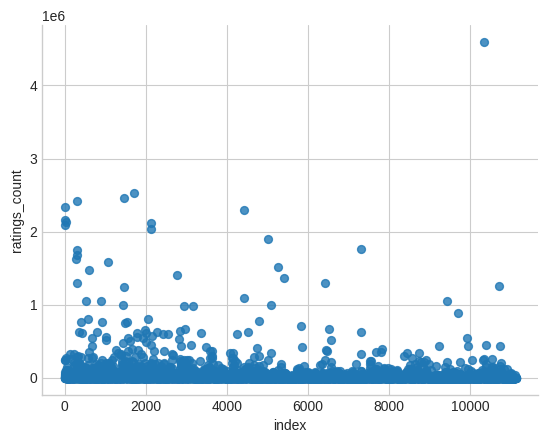

In [92]:
from matplotlib import pyplot as plt
_df_13.plot(kind='scatter', x='index', y='ratings_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

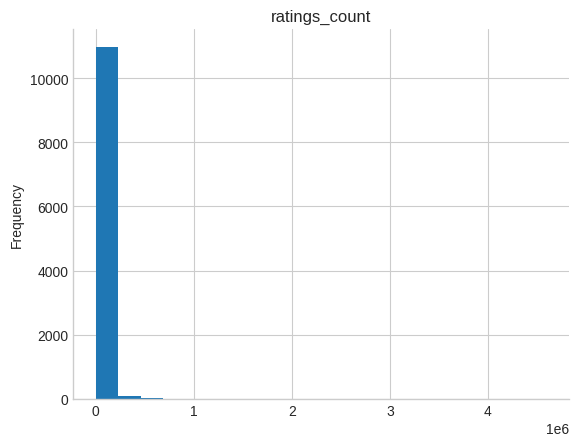

In [90]:
from matplotlib import pyplot as plt
_df_12['ratings_count'].plot(kind='hist', bins=20, title='ratings_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

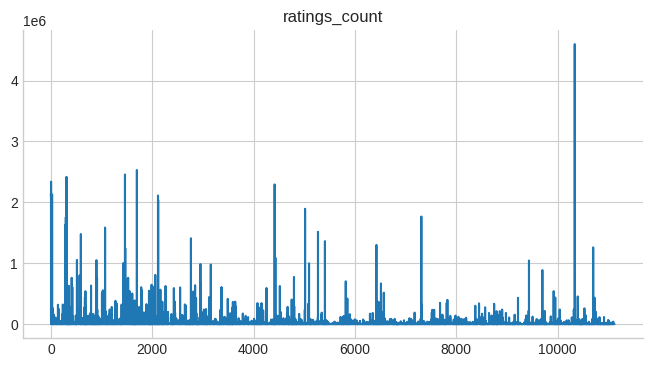

In [91]:
from matplotlib import pyplot as plt
_df_17['ratings_count'].plot(kind='line', figsize=(8, 4), title='ratings_count')
plt.gca().spines[['top', 'right']].set_visible(False)

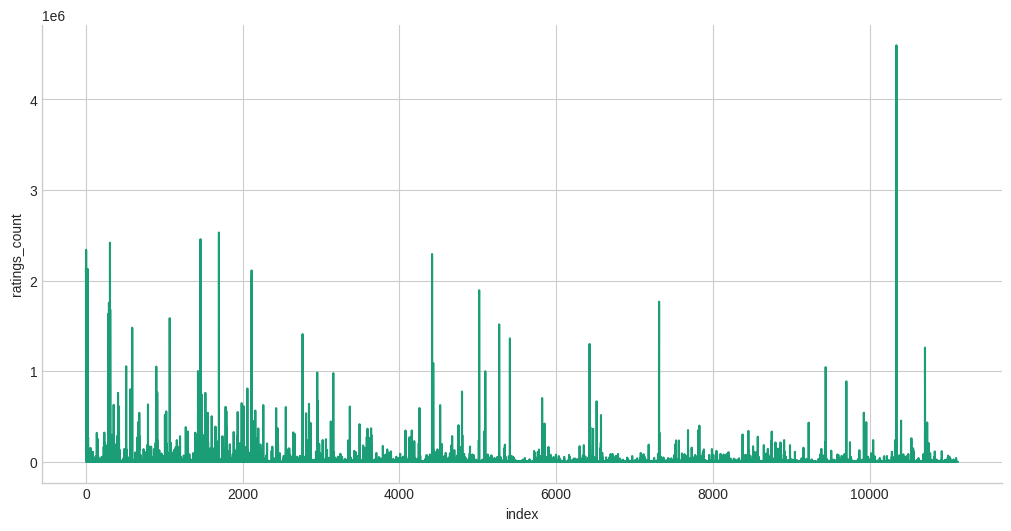

In [88]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['ratings_count']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('ratings_count')

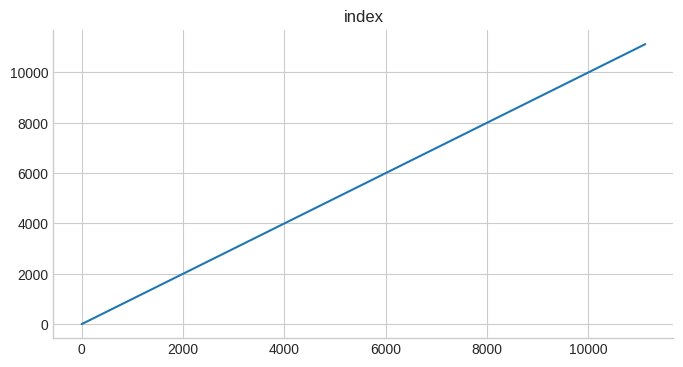

In [86]:
from matplotlib import pyplot as plt
_df_16['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)